# MODULE 2: Fine-tune on EY Challenge 2024 dataseet

In this module, we will use the pretrained model from  Module 1, and fine-tune it using EY Challenge 2024 dataset. 

The pipeline for Module 2 is shown below:
1. A **fine-grained dataset** is prepared. Specifically, we go through the post-event dataset, and find relevant images that are suitable for training. Notably, we keep in mind of the potential class imbalanced issue while collecting the relevant images. Then, we annotate the dataset.
2. **Transfer Learning**: Use pretrained YOLOv8 (from Module 1) on the fine-grained dataset

Note that without transfer learning using Module 1's YOLOv8, there is a high chance of overfitting on the actual test data provided by the EY Challenge 2024 dataset. You might get a better train mAP, but it does not actually reflect the mAP on the test set.

## Dependencies

In [1]:
# Install YOLOv8
!pip install ultralytics==8.0.196

# Import required libraries
from IPython import display
display.clear_output()

## Custom Training

In [2]:
# import shutil

# # if you are doing multiple experiments, you may need to delete previous runs

# try:
#     shutil.rmtree('/home/tham/Desktop/delete/EY/runs')
# except:
#     pass

# try:
#     os.remove('/home/tham/Desktop/delete/EY/submission.zip')
# except:
#     pass

In [3]:
from ultralytics import YOLO

# yaml file of the training dataset
dataset = "fine-grained-dataset"
yaml_file = f"{dataset}/data.yaml"

# use COCO pretrained YOLOv8 models from Module 1 for transfer learning
model = YOLO("/home/tham/Desktop/delete/EY/pretrained/detect/train/weights/best.pt")
model.train(data=yaml_file, epochs=50, imgsz=512, plots=True)

New https://pypi.org/project/ultralytics/8.1.17 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.8.10 torch-2.2.0+cu121 CUDA:0 (NVIDIA GeForce RTX 2070 Super, 7974MiB)
engine/trainer: task=detect, mode=train, model=/home/tham/Desktop/delete/EY/pretrained/detect/train/weights/best.pt, data=fine-grained-dataset/data.yaml, epochs=50, patience=50, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_st

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f6b3024b250>
fitness: 0.24719015107562764
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.30809,      0.3503,     0.20367,    0.049625])
names: {0: '0', 1: '1', 2: '2', 3: '3'}
plot: True
results_dict: {'metrics/precision(B)': 0.40435183952478204, 'metrics/recall(B)': 0.4580406712984994, 'metrics/mAP50(B)': 0.42062301242022593, 'metrics/mAP50-95(B)': 0.22791983314845005, 'fitness': 0.24719015107562764}
save_dir: PosixPath('runs/detect/train')
speed: {'preprocess': 0.10685920715332031, 'inference': 0.9597301483154297, 'loss': 0.0006993611653645833, 'postprocess': 1.4088948567708333}

## Results and Visualization

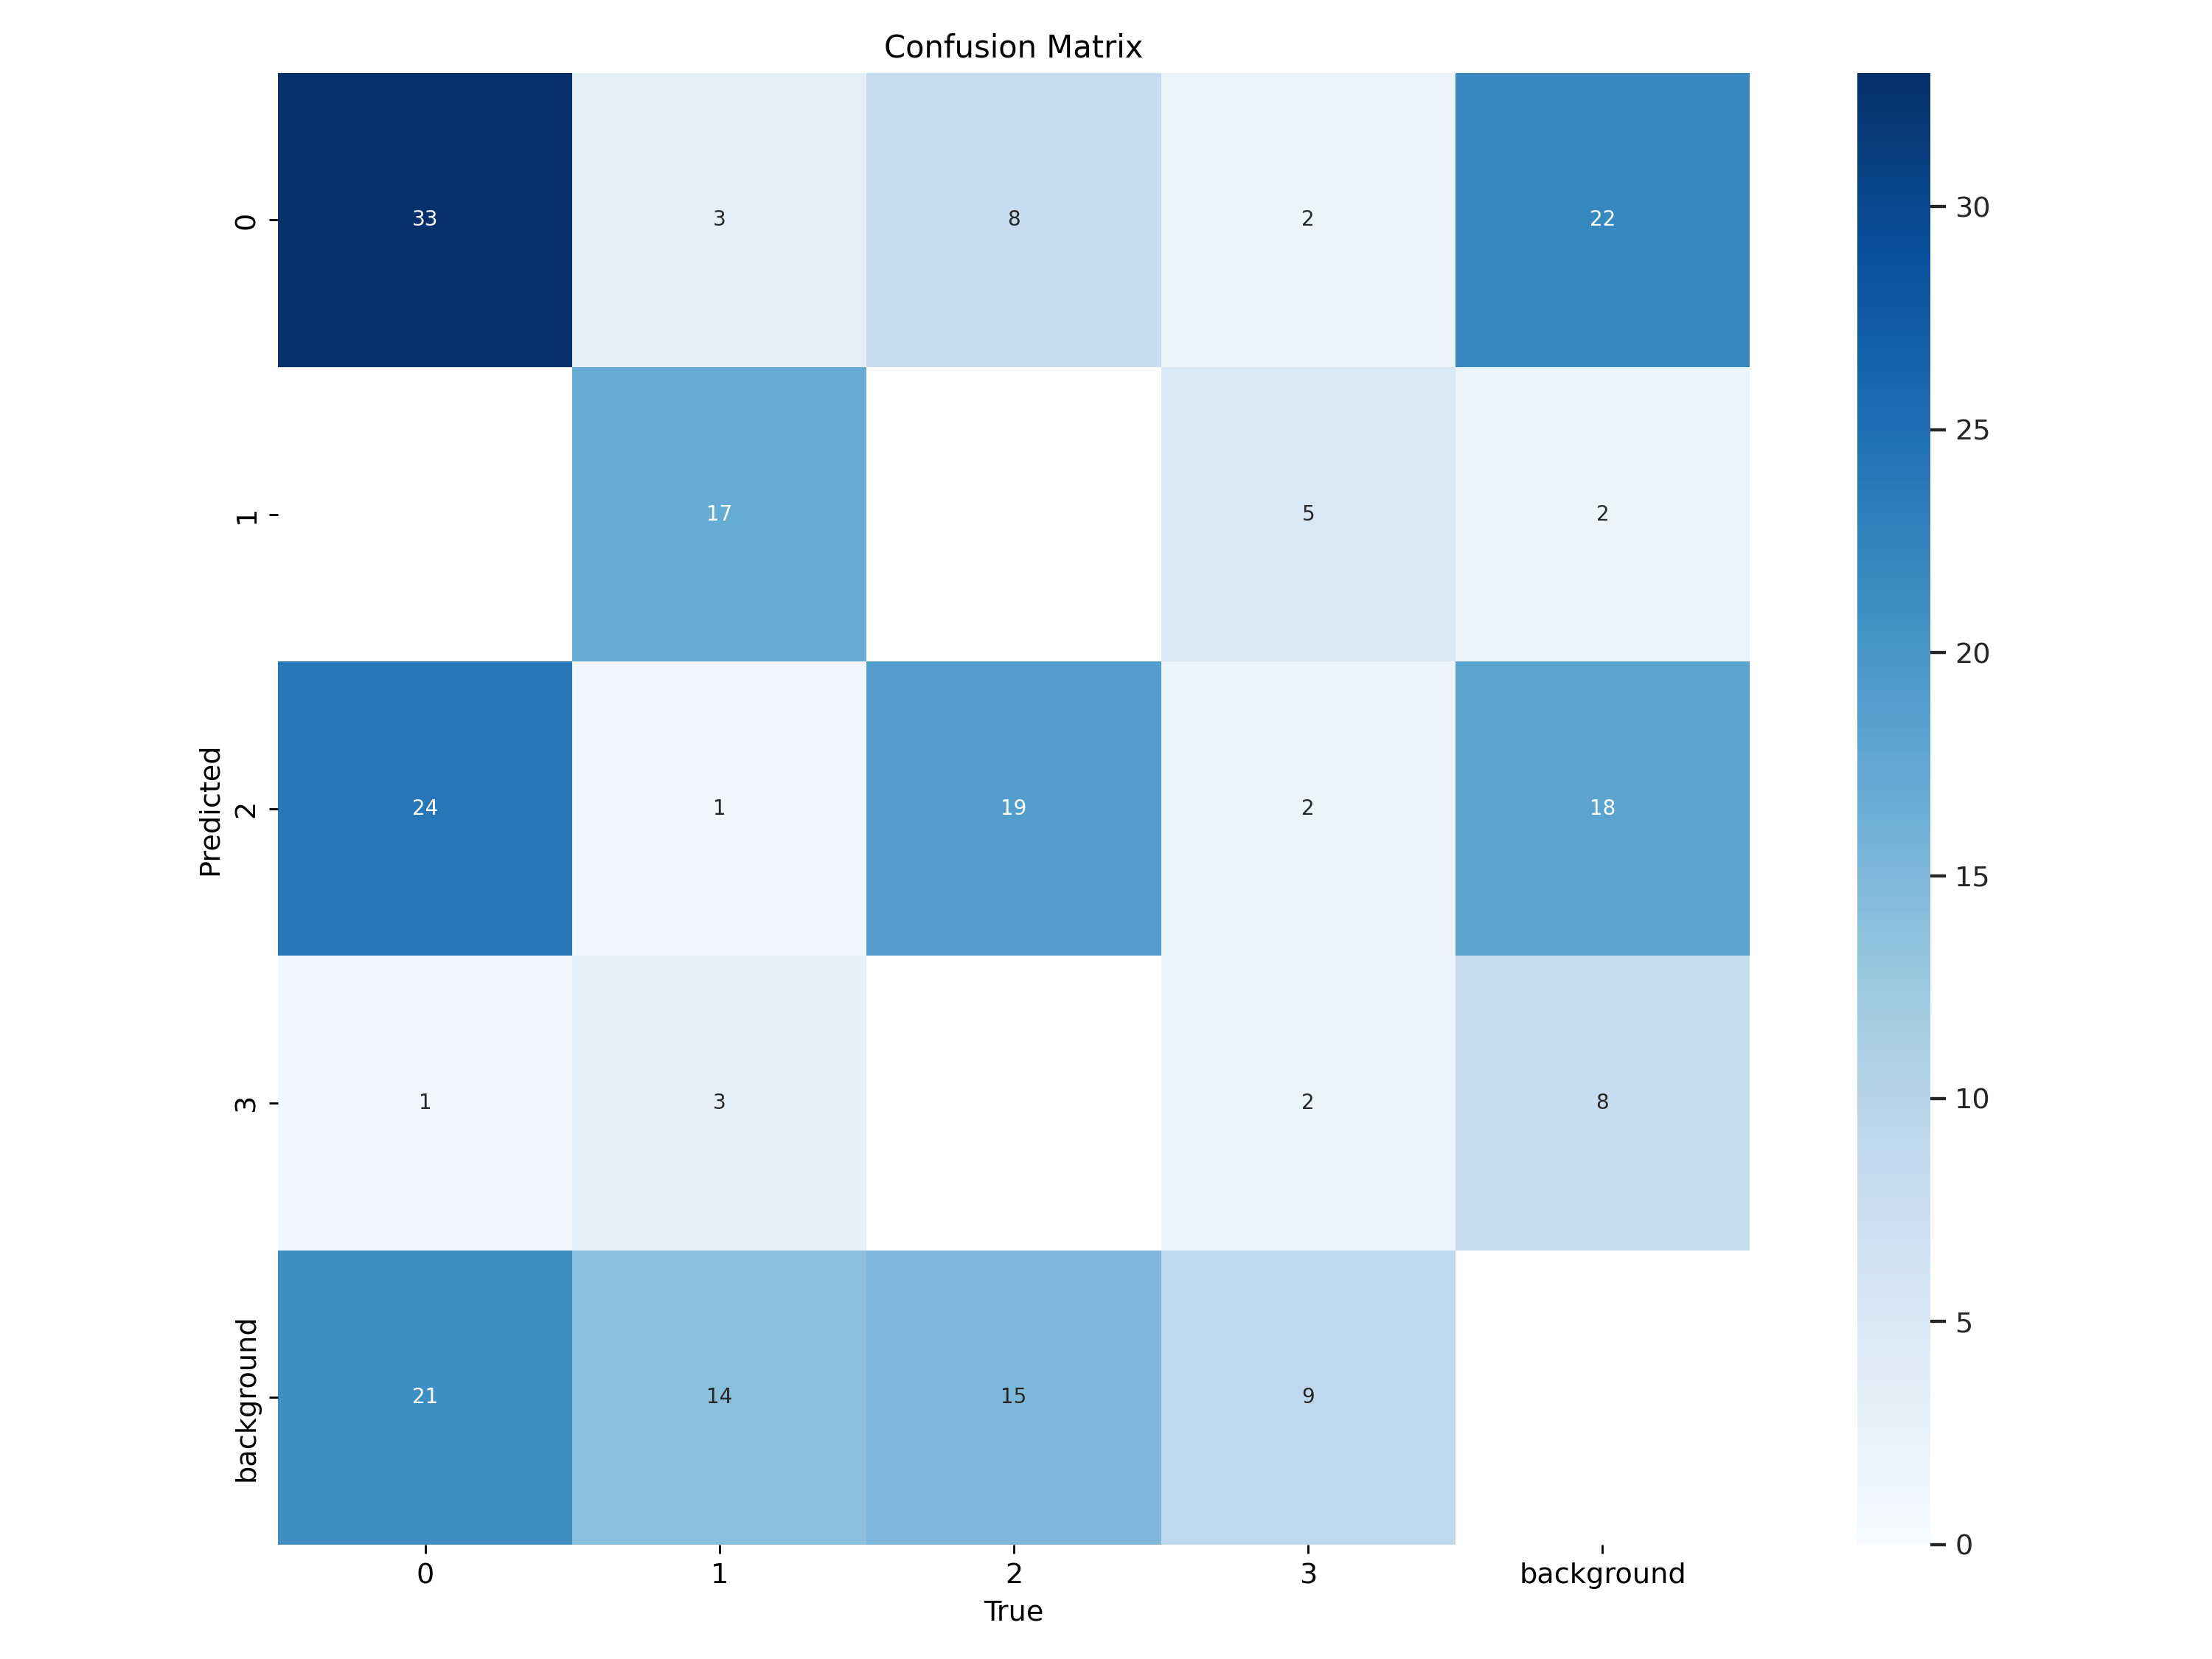

In [4]:
from IPython.display import Image

Image(filename=f'runs/detect/train/confusion_matrix.png', width=600)

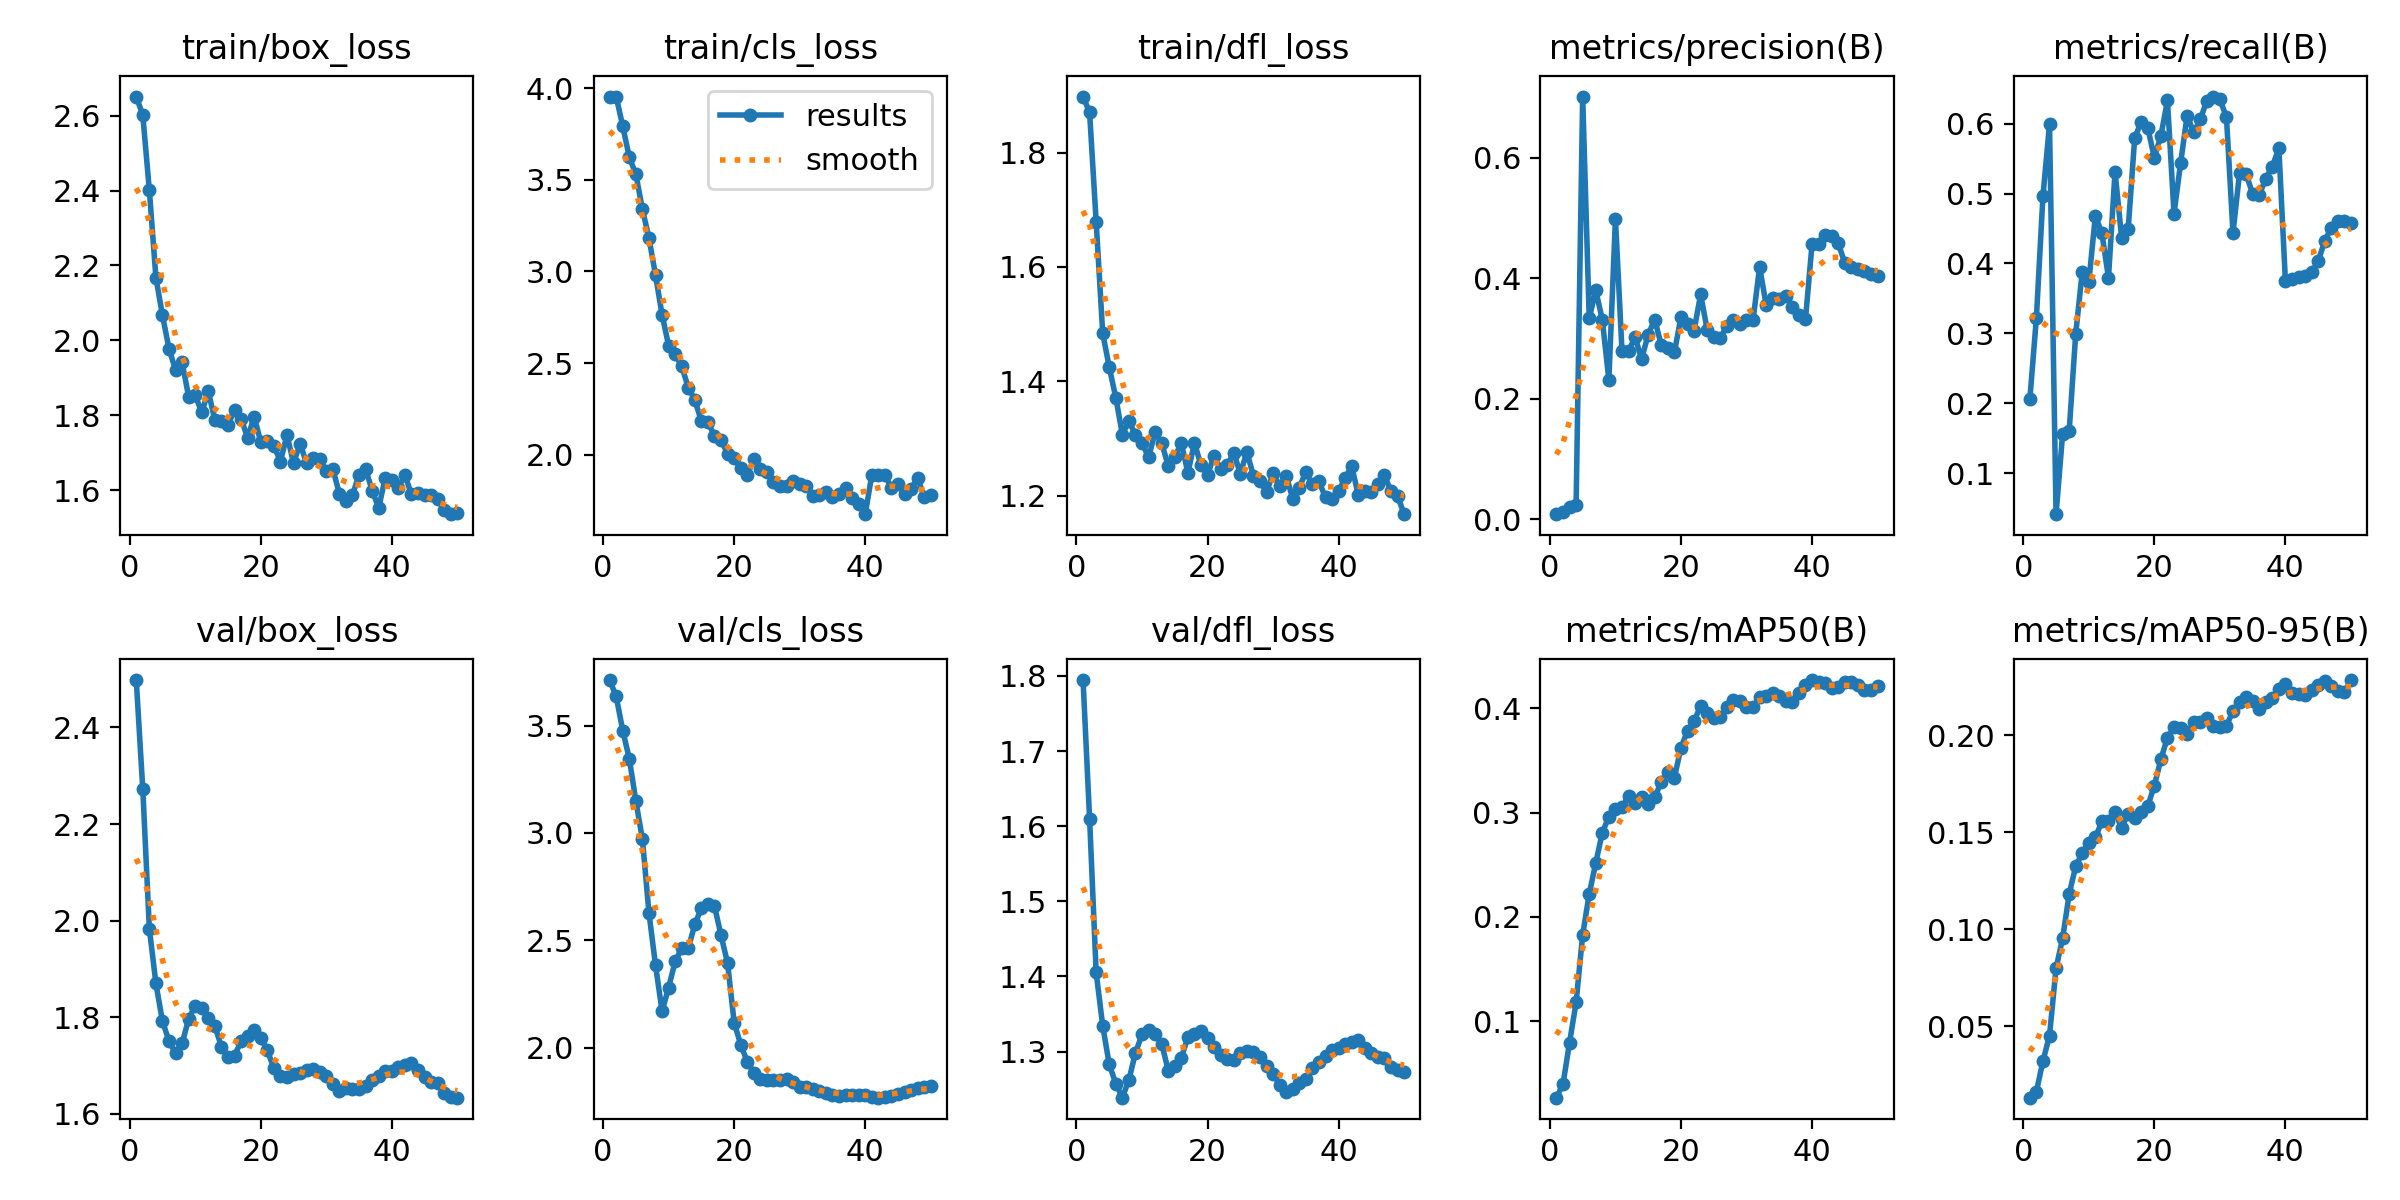

In [5]:
Image(filename=f'runs/detect/train/results.png', width=600)

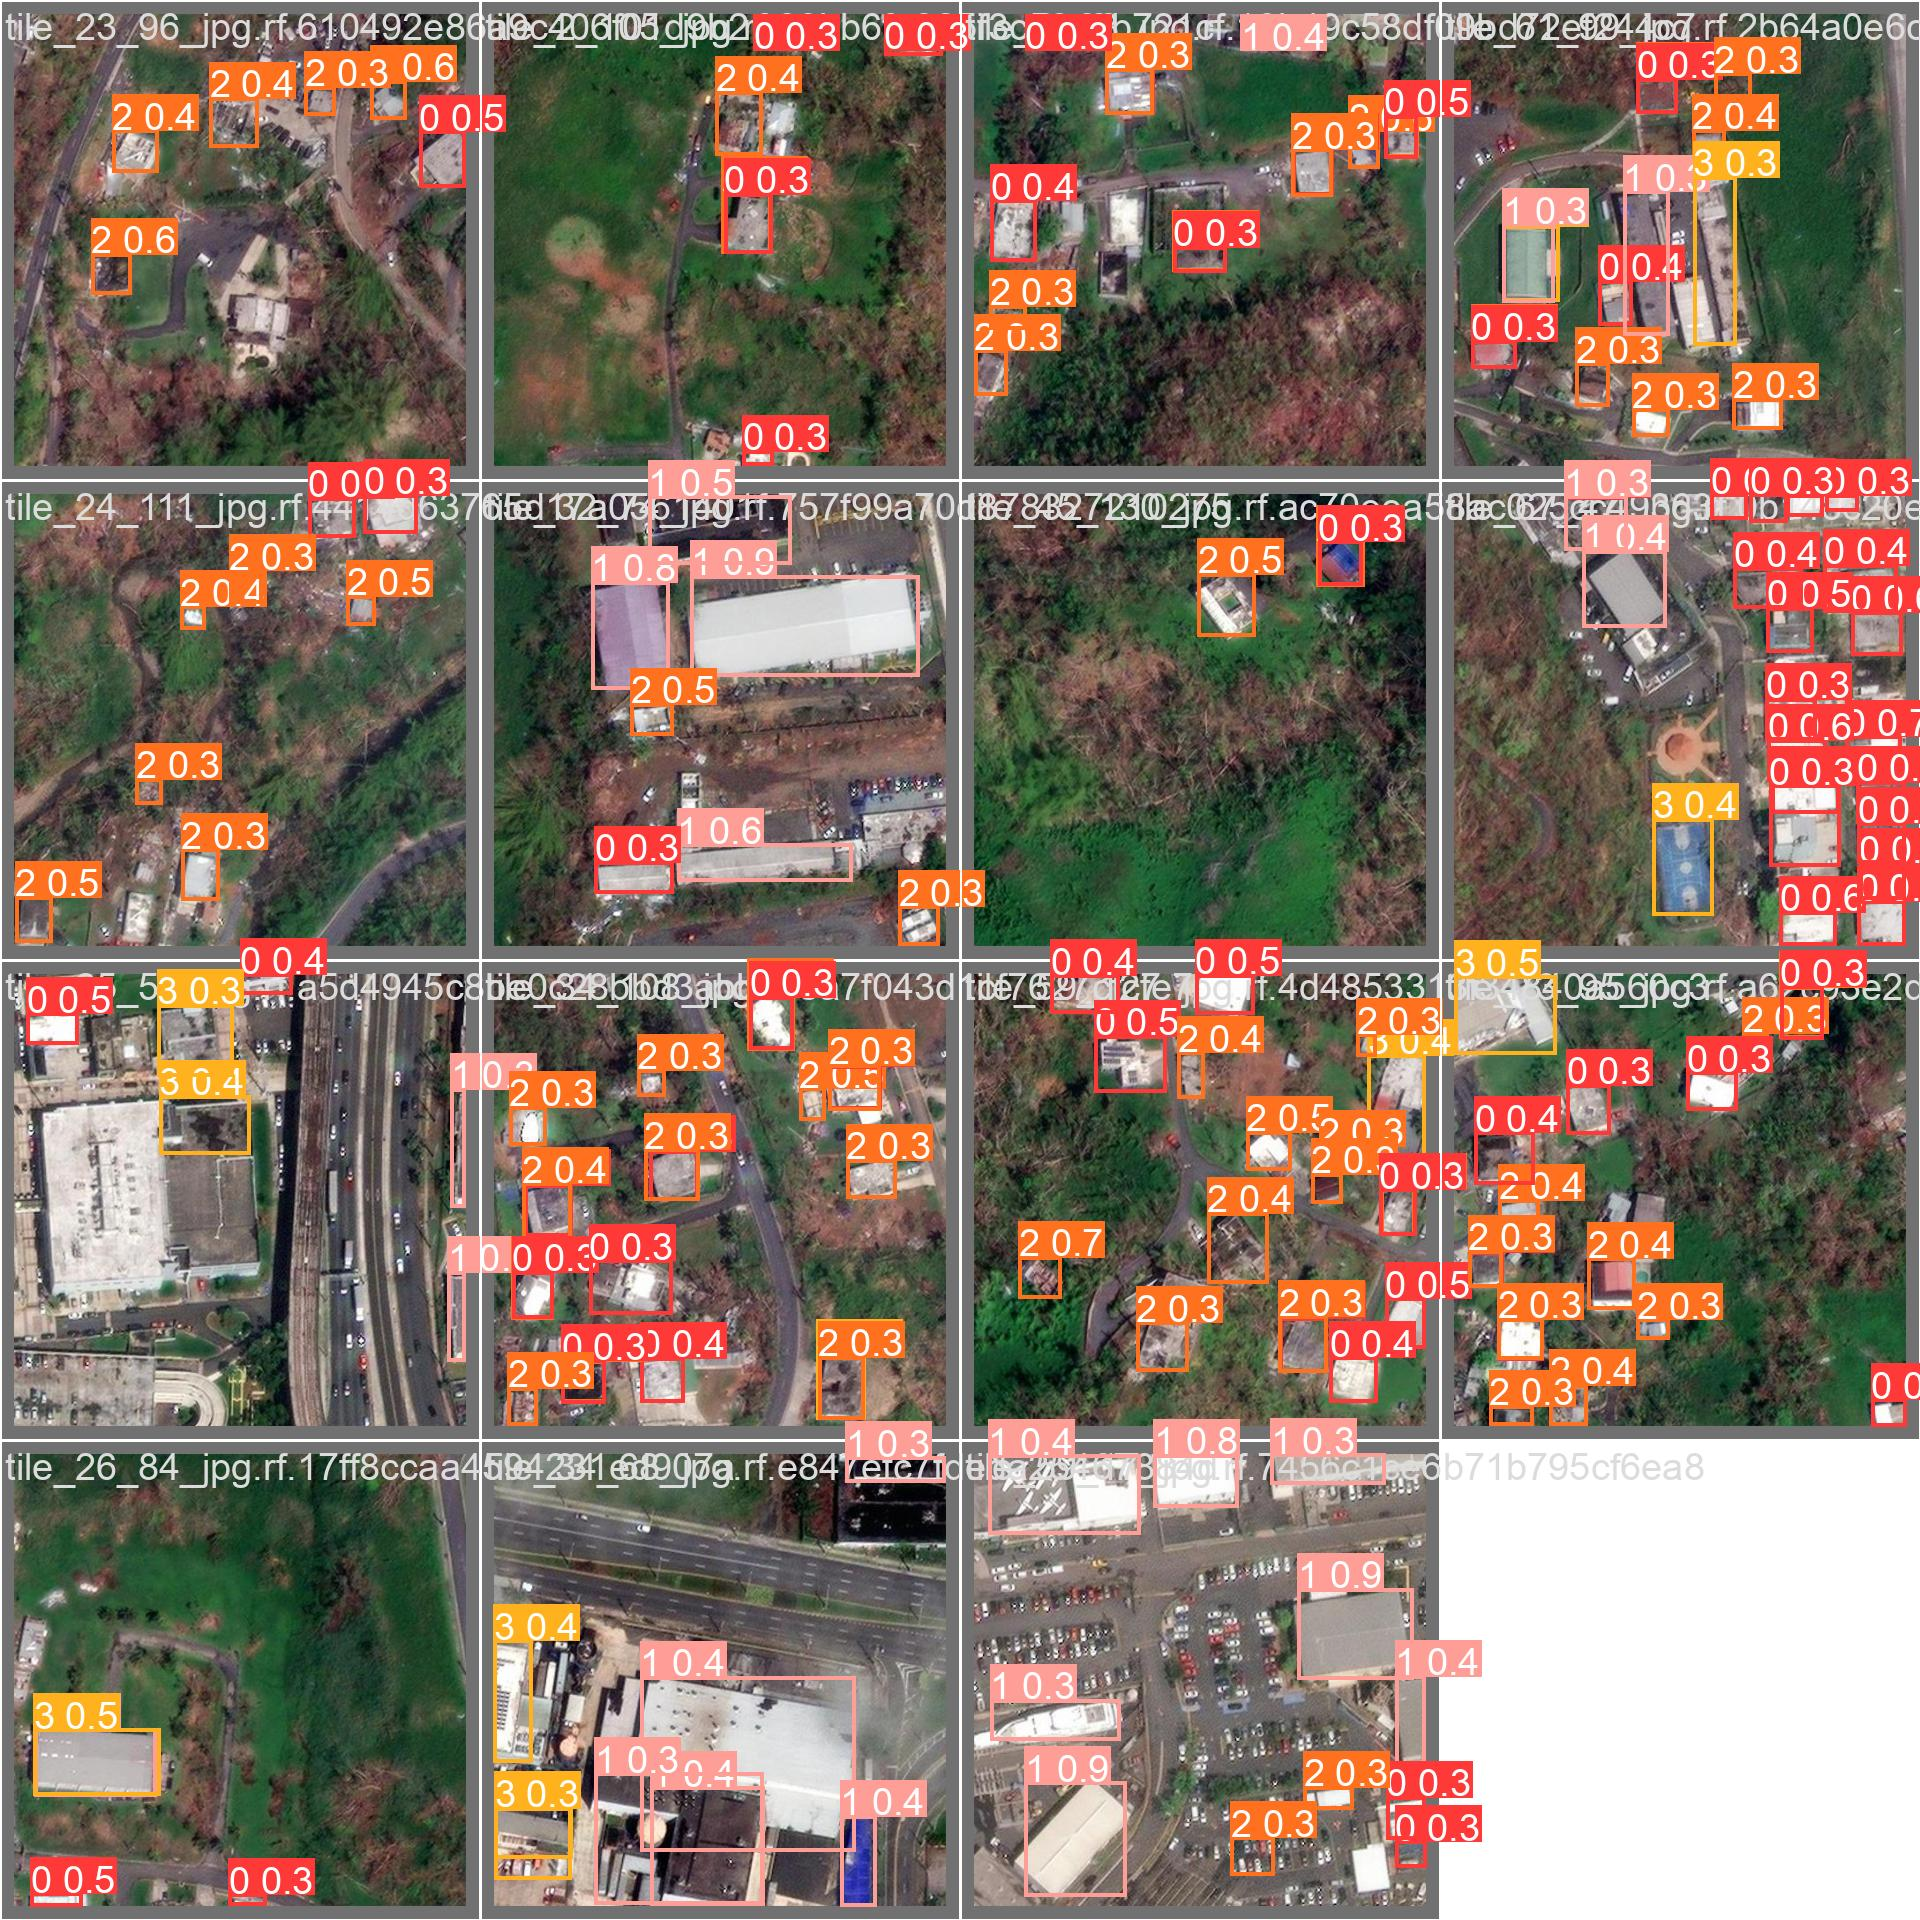

In [6]:
Image(filename=f'runs/detect/train/val_batch0_pred.jpg', width=600)

In [7]:
# Check the metrics provided
import pandas as pd

df = pd.read_csv(f'runs/detect/train/results.csv')
df.tail()

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
45,46,1.5858,1.7841,1.2203,0.41794,0.43203,0.42474,0.22793,1.6662,1.7925,1.2923,0.000161,0.000161,0.000161
46,47,1.5750,1.8110,1.2356,0.41454,0.45129,0.42191,0.22543,1.6628,1.8028,1.2912,0.000136,0.000136,0.000136
47,48,1.5477,1.8753,1.2076,0.41111,0.46043,0.41744,0.22318,1.6429,1.8128,1.2792,0.000111,0.000111,0.000111
48,49,1.5358,1.7667,1.1994,0.40642,0.46115,0.41746,0.22240,1.6357,1.8170,1.2756,0.000087,0.000087,0.000087
49,50,1.5384,1.7824,1.1679,0.40336,0.45804,0.42159,0.22859,1.6333,1.8188,1.2732,0.000062,0.000062,0.000062


In [8]:
import matplotlib.pyplot as plt

epochs = df['                  epoch']
mAP50_B = df['       metrics/mAP50(B)']
mAP50_95_B = df['    metrics/mAP50-95(B)']

fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(epochs, mAP50_B, label='mAP50(B)')
ax.plot(epochs, mAP50_95_B, label='    metrics/mAP50-95(B)')
ax.set_ylabel('mAP')
ax.set_xlabel('Epoch')
ax.legend()
fig.suptitle('mAP50(B) and mAP50-95(B) vs Epoch')
plt.show()

<Figure size 500x400 with 1 Axes>

## Phase 1 Submission

In [9]:
import os
import zipfile

def unzip_folder(zip_filepath, dest_dir):
    with zipfile.ZipFile(zip_filepath, 'r') as zip_ref:
        zip_ref.extractall(dest_dir)
    print(f'The zip file {zip_filepath} has been extracted to the directory {dest_dir}')



submission_zip = './challenge_1_submission_images.zip'
submission_directory = './challenge_1_submission_images'
if not os.path.isdir(submission_directory):
    unzip_folder(submission_zip,submission_directory)

In [10]:
# Load the Model
model = YOLO('runs/detect/train/weights/best.pt')

In [11]:
# Decoding according to the .yaml file class names order
decoding_of_predictions ={0: 'undamagedresidentialbuilding', 1: 'undamagedcommercialbuilding', 2: 'damagedresidentialbuilding', 3: 'damagedcommercialbuilding'}

directory = 'challenge_1_submission_images/Validation_Data_JPEG'
directory = 'challenge_1_submission_images/Submission data'
# Directory to store outputs
results_directory = 'Validation_Data_Results'

# Create submission directory if it doesn't exist
if not os.path.exists(results_directory):
    os.makedirs(results_directory)

# Loop through each file in the directory
for filename in os.listdir(directory):
    # Check if the current object is a file and ends with .jpeg
    if os.path.isfile(os.path.join(directory, filename)) and filename.lower().endswith('.jpg'):
        # Perform operations on the file
        file_path = os.path.join(directory, filename)
        print(file_path)
        print("Making a prediction on ", filename)
        results = model.predict(file_path, save=True, iou=0.5, save_txt=True, conf=0.25)
        
        for r in results:
            conf_list = r.boxes.conf.cpu().numpy().tolist()
            clss_list = r.boxes.cls.cpu().numpy().tolist()
            original_list = clss_list
            updated_list = []
            for element in original_list:
                 updated_list.append(decoding_of_predictions[int(element)])

        bounding_boxes = r.boxes.xyxy.cpu().numpy()
        confidences = conf_list
        class_names = updated_list

        # Check if bounding boxes, confidences and class names match
        if len(bounding_boxes) != len(confidences) or len(bounding_boxes) != len(class_names):
            print("Error: Number of bounding boxes, confidences, and class names should be the same.")
            continue
        text_file_name = os.path.splitext(filename)[0]
        # Creating a new .txt file for each image in the submission_directory
        with open(os.path.join(results_directory, f"{text_file_name}.txt"), "w") as file:
            for i in range(len(bounding_boxes)):
                # Get coordinates of each bounding box
                left, top, right, bottom = bounding_boxes[i]
                # Write content to file in desired format
                file.write(f"{class_names[i]} {confidences[i]} {left} {top} {right} {bottom}\n")
        print("Output files generated successfully.")


image 1/1 /home/tham/Desktop/delete/EY/challenge_1_submission_images/Submission data/Validation_Post_Event_006.jpg: 512x512 26 0s, 6 2s, 6.8ms
Speed: 0.7ms preprocess, 6.8ms inference, 1.8ms postprocess per image at shape (1, 3, 512, 512)
Results saved to runs/detect/predict
1 label saved to runs/detect/predict/labels



challenge_1_submission_images/Submission data/Validation_Post_Event_006.jpg
Making a prediction on  Validation_Post_Event_006.jpg
Output files generated successfully.
challenge_1_submission_images/Submission data/Validation_Post_Event_012.jpg
Making a prediction on  Validation_Post_Event_012.jpg


image 1/1 /home/tham/Desktop/delete/EY/challenge_1_submission_images/Submission data/Validation_Post_Event_012.jpg: 512x512 13 0s, 2 1s, 6 2s, 6.1ms
Speed: 0.6ms preprocess, 6.1ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 512)
Results saved to runs/detect/predict
2 labels saved to runs/detect/predict/labels

image 1/1 /home/tham/Desktop/delete/EY/challenge_1_submission_images/Submission data/Validation_Post_Event_005.jpg: 512x512 30 0s, 7 2s, 6.5ms
Speed: 0.8ms preprocess, 6.5ms inference, 1.8ms postprocess per image at shape (1, 3, 512, 512)
Results saved to runs/detect/predict
3 labels saved to runs/detect/predict/labels

image 1/1 /home/tham/Desktop/delete/EY/challenge_1_submission_images/Submission data/Validation_Post_Event_002.jpg: 512x512 4 0s, 7 2s, 6.2ms
Speed: 0.6ms preprocess, 6.2ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 512)
Results saved to runs/detect/predict
4 labels saved to runs/detect/predict/labels

image 1/1 /home/tham/Desktop/

Output files generated successfully.
challenge_1_submission_images/Submission data/Validation_Post_Event_005.jpg
Making a prediction on  Validation_Post_Event_005.jpg
Output files generated successfully.
challenge_1_submission_images/Submission data/Validation_Post_Event_002.jpg
Making a prediction on  Validation_Post_Event_002.jpg
Output files generated successfully.
challenge_1_submission_images/Submission data/Validation_Post_Event_004.jpg
Making a prediction on  Validation_Post_Event_004.jpg
Output files generated successfully.
challenge_1_submission_images/Submission data/Validation_Post_Event_007.jpg
Making a prediction on  Validation_Post_Event_007.jpg
Output files generated successfully.
challenge_1_submission_images/Submission data/Validation_Post_Event_009.jpg
Making a prediction on  Validation_Post_Event_009.jpg


image 1/1 /home/tham/Desktop/delete/EY/challenge_1_submission_images/Submission data/Validation_Post_Event_009.jpg: 512x512 13 0s, 5 2s, 1 3, 5.8ms
Speed: 0.7ms preprocess, 5.8ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 512)
Results saved to runs/detect/predict
7 labels saved to runs/detect/predict/labels

image 1/1 /home/tham/Desktop/delete/EY/challenge_1_submission_images/Submission data/Validation_Post_Event_010.jpg: 512x512 5 0s, 3 1s, 3 2s, 3 3s, 5.8ms
Speed: 1.9ms preprocess, 5.8ms inference, 3.1ms postprocess per image at shape (1, 3, 512, 512)
Results saved to runs/detect/predict
8 labels saved to runs/detect/predict/labels

image 1/1 /home/tham/Desktop/delete/EY/challenge_1_submission_images/Submission data/Validation_Post_Event_011.jpg: 512x512 6 0s, 2 1s, 2 2s, 5.8ms
Speed: 0.6ms preprocess, 5.8ms inference, 2.6ms postprocess per image at shape (1, 3, 512, 512)
Results saved to runs/detect/predict
9 labels saved to runs/detect/predict/labels

image 1/1 /ho

Output files generated successfully.
challenge_1_submission_images/Submission data/Validation_Post_Event_010.jpg
Making a prediction on  Validation_Post_Event_010.jpg
Output files generated successfully.
challenge_1_submission_images/Submission data/Validation_Post_Event_011.jpg
Making a prediction on  Validation_Post_Event_011.jpg
Output files generated successfully.
challenge_1_submission_images/Submission data/Validation_Post_Event_003.jpg
Making a prediction on  Validation_Post_Event_003.jpg
Output files generated successfully.
challenge_1_submission_images/Submission data/Validation_Post_Event_008.jpg
Making a prediction on  Validation_Post_Event_008.jpg
Output files generated successfully.
challenge_1_submission_images/Submission data/Validation_Post_Event_001.jpg
Making a prediction on  Validation_Post_Event_001.jpg
Output files generated successfully.


In [12]:
import shutil

# Define your source directory and the destination where the zip file will be created
source_dir = results_directory
destination_zip = 'submission'

# Create a zip file from the directory
shutil.make_archive(destination_zip, 'zip', source_dir)

print(f"Directory {source_dir} has been successfully zipped into {destination_zip}.")

Directory Validation_Data_Results has been successfully zipped into submission.
